# Stream Ciphers

A stream cipher is a deterministic cipher that process message bit by bit, usefull for stream.

## Stream Cipher Principle

Idea is similar to **one-time-pad**, because stream ciphers use a pseudo random keystream, with same lenght of message, combined with plaintext (XOR) in order to create ciphertext.

$$ C[i] = M[i] \oplus S_{key}[i]$$

Keystream is generated by **pseudo-random generator**(PRG) using a *seed* and it needs to satisfies security properties:

- Long period with no repetitions
- Statistically random
- Depends on large enough key
- Large linear complexity

## Stream Cipher Structure

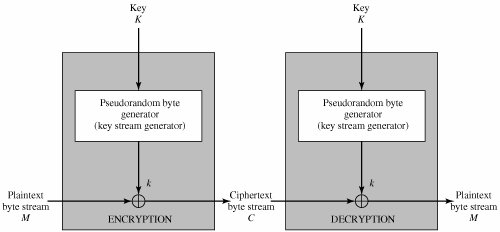

Using same *seed* for generate encryption and decryption keystream is easy encrypt and decrypt a message using seed as key. Nevertheless, stream cipher need to be synchronized for each parts.

## RC4

RC4 is an stream cipher, enough simple but effective, with a variable key size that is used widely in SSL/TLS and wireless WEP/WPA.

It is designed to operate on 8-bit values, in order to be used on most of processors, that are permutated to scamble input and generate a byte(not bit) to be used in keystream.

Hearth of RC4 is his PRG, PRG mantains his internal state using an array S of 256 bytes, in which each byte apperas once. Internal state is initialized through the seed that is the key of RC4.

```python
for i in range(0xff):
    S[i] = i
    T[i] = K[i % len(key)]
j = 0
for i in range(0xff):
    j = (j +  S[i] + T[i]) % 0xff
    swap(S[i],S[j])
```

Once the array S is initialized, PRG generates an one byte pseudo-random output using following stream generator:

```python
i = 0
j = 0
for m_byte in message:
    i = (i + 1) % 0xff
    j = (j + S[i]) % 0xff
    swap(S[i],S[j])
    t = (S[i] + S[j])  % 0xff
    c = xor(m_byte, S[t])
```

Stream is not periodical due to changing internal state through input, nevertheless randomness is not enough. RC4 is affected by bias on initial output and stream, so RC4 can be broken capturing a lot of packets (due to linearity).

